### 🧩 Product Metrics Analysis

This project focuses on analyzing user activity and key product metrics of a news feed mobile application.
The app allows users to browse posts, like them, and interact with the content they find engaging.
The main objective of this analysis is to understand how user behavior changed after a major marketing campaign.

**Context**

Two significant events occurred in the app over the past few days:
1. Marketing Campaign Launch — a large number of new users joined the app as a result of a promotional campaign.
2. Audience Drop — shortly after, a sudden decrease in user activity was observed.

**Goal**

To evaluate how the main product metrics evolved during this period:
- User activity (DAU, MAU, Stickiness);
- User retention (Retention Rate);
- Engagement metrics (views, likes);
- The overall impact of the marketing campaign on user growth and retention.

**Key Questions:**

- How did user activity change before and after the campaign?
- What proportion of users were new vs. returning?
- Is the audience drop a true anomaly or a natural decline after the campaign?
- What are the possible reasons behind the observed behavioral shifts?


In [1]:
#importing libraries
import pandahouse as ph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#database connection parameters (ClickHouse)
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator'
}

In [3]:
#count DAU
query = """
select 
    count(distinct user_id) as total_users,
    toDate(time) as date
from simulator_20250820.feed_actions
where toDate(time) BETWEEN '2025-07-01' AND '2025-09-01'
group by date
order by date
"""

In [4]:
# test query
df = ph.read_clickhouse(query, connection=connection)

In [5]:
df.head(2)

,total_users,date
0,878,2025-07-06
1,2238,2025-07-07


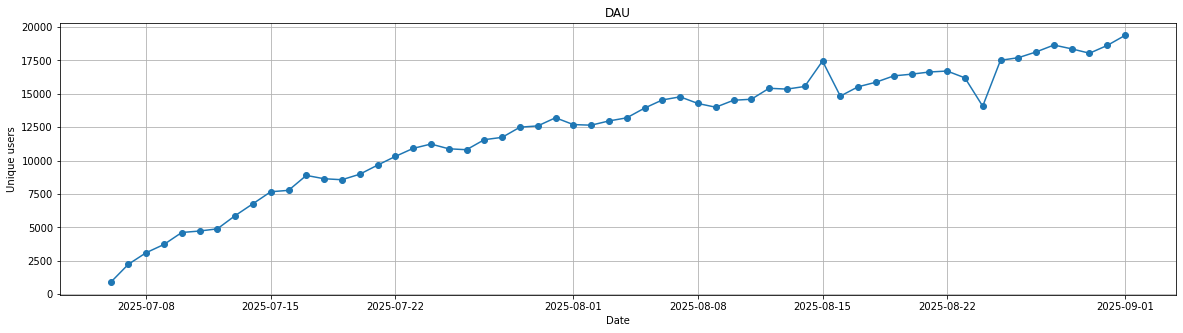

In [6]:
# plotting a line chart of DAU
plt.figure(figsize=(20, 5))
plt.plot(df["date"], df["total_users"], marker="o")
plt.title("DAU")
plt.xlabel("Date")
plt.ylabel("Unique users")
plt.grid(True)
plt.show()

Based on the plotted DAU chart for the news feed, we can assume that a marketing campaign took place on August 15, 2025.
The number of unique active users on that day reached 17 452.

Next, we will calculate the Retention Rate (RR) for the cohort of August 15, 2025,
that is, for users who performed a target action on this day — registered in the app or visited the news feed.

In [7]:
query_2 = """
select 
    date, 
    count(user_id) 
from
(
select 
    user_id
from simulator_20250820.feed_actions
Group By user_id
Having min(toDate(time)) = '2025-08-15'
) t1

join
(
select 
    distinct user_id,
    toDate(time) as date
from simulator_20250820.feed_actions
where toDate(time) BETWEEN '2025-08-15' AND '2025-09-01'
) t2
using user_id
GROUP BY date
"""

In [8]:
#test query
df2 = ph.read_clickhouse(query_2, connection=connection)

In [9]:
#rename the column
df2.rename(columns={"count(user_id)": "active_users"}, inplace=True)

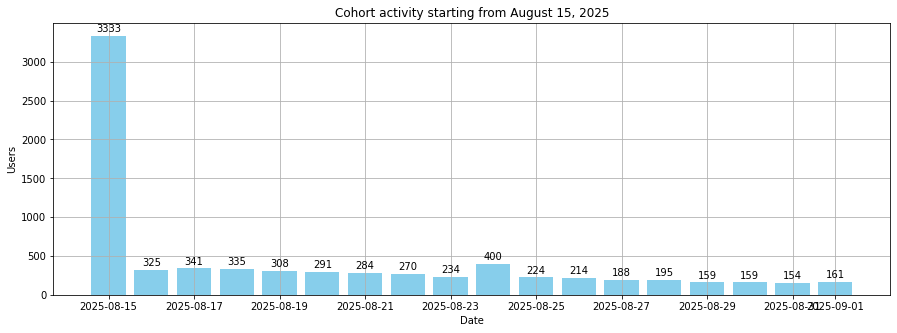

In [10]:
#plotting a bar chart for the cohort starting from August 15, 2025
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(df2["date"], df2["active_users"], color="skyblue")
ax.bar_label(bars, padding=2)
plt.title("Cohort activity starting from August 15, 2025")
plt.xlabel("Date")
plt.ylabel("Users")
plt.grid(True)
plt.show()

On the first day (Day 0), 3,333 users joined the app.
On the second day, 325 users returned.

The Retention Rate (RR) can be calculated as:

RR = (325/3333)*100%=9.75% 

This means that only 9.75% of users from the initial cohort were retained on the next day.
Such a low retention rate raises an important question — is this value acceptable for our application?
We will address this question later when we build a heatmap to analyze retention across nearby cohorts.

Next, let’s examine how many users the marketing campaign brought to the app and how many of them we managed to retain.

In [11]:
query_3 = """
select 
    date, 
    count(user_id) 
from
(
select 
    user_id
from simulator_20250820.feed_actions
where source='ads'
Group By user_id
Having min(toDate(time)) = '2025-08-15'
) t1

join
(
select 
    distinct user_id,
    toDate(time) as date
from simulator_20250820.feed_actions
where toDate(time) BETWEEN '2025-08-15' AND '2025-09-01'
) t2
using user_id
GROUP BY date
"""

In [12]:
#test query
df3 = ph.read_clickhouse(query_3, connection=connection)

In [13]:
#rename the column
df3.rename(columns={"count(user_id)": "active_users"}, inplace=True)

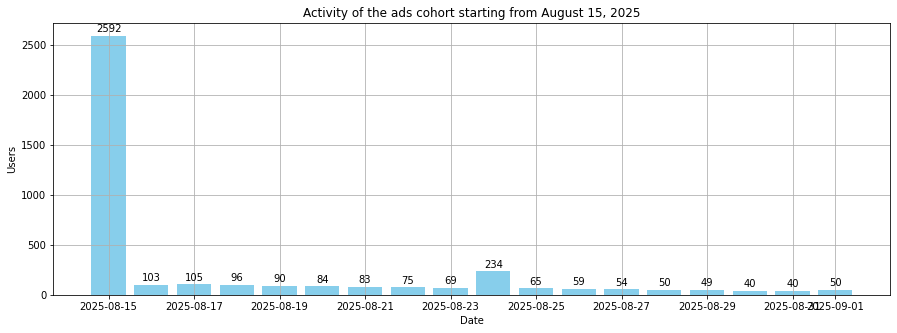

In [14]:
#plotting a bar chart for the cohort starting from August 15, 2025
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(df3["date"], df3["active_users"], color="skyblue")
ax.bar_label(bars, padding=2)
plt.title("Activity of the ads cohort starting from August 15, 2025")
plt.xlabel("Date")
plt.ylabel("Users")
plt.grid(True)
plt.show()

RR = (103/2592)*100%=3.97%

Thus, after the marketing campaign (source = 'ads') on August 15, 2025,
96.03% of users churned the next day, and only 3.97% were retained.


Next, let’s analyze how many users came through the organic channel and how many of them we managed to retain.

In [15]:
query_4 = """
select 
    date, 
    count(user_id) 
from
(
select 
    user_id
from simulator_20250820.feed_actions
where source='organic'
Group By user_id
Having min(toDate(time)) = '2025-08-15'
) t1

join
(
select 
    distinct user_id,
    toDate(time) as date
from simulator_20250820.feed_actions
where toDate(time) BETWEEN '2025-08-15' AND '2025-09-01'
) t2
using user_id
GROUP BY date
"""

In [16]:
#test query
df4 = ph.read_clickhouse(query_4, connection=connection)

In [17]:
#rename the column
df4.rename(columns={"count(user_id)": "active_users"}, inplace=True)

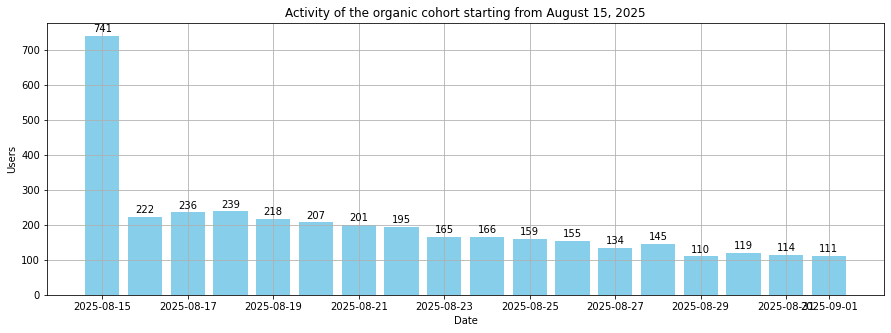

In [18]:
#plotting a bar chart for the cohort starting from August 15, 2025
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(df4["date"], df4["active_users"], color="skyblue")
ax.bar_label(bars, padding=2)
plt.title("Activity of the organic cohort starting from August 15, 2025")
plt.xlabel("Date")
plt.ylabel("Users")
plt.grid(True)
plt.show()

RR = (222/741)*100%=29.9%

The number of users who joined organically on August 15, 2025, remained more stable, without a sharp decline.
On the first day, 29.9% of users were retained. Over the following days, the cohort showed a gradual decrease in active users, although the decline was not significant.

Summary for the analyzed cohort:

- Organic users demonstrated much more stable retention. After 13 days, their RR was 19.5%;

- Ad-acquired users experienced a sharp drop, followed by a slow fade. After 13 days, their RR fell to 1.92%. Such behavior is typical for advertising traffic — users arrive under the influence of marketing campaigns but are harder to retain compared to organic users. However, such a low retention rate still raises concerns and indicates the need for a deeper analysis of the churn causes.

Earlier, we noted that the overall RR for this cohort was below 10%, which already suggested a potential retention problem.
Moreover, the RR for users who came exclusively through the ads channel was below 5%.

In [35]:
query_5="""
select 
    date,
    start_date,
    count(user_id) as active_users
from
(
select 
    user_id,
    min(toDate(time)) as start_date
from simulator_20250820.feed_actions
where source='ads'
group by user_id
having start_date between '2025-08-13' and '2025-08-25'
) t1
join
(
select 
    distinct user_id,
    toDate(time) as date
from simulator_20250820.feed_actions
where toDate(time) <= '2025-09-01'
) t2
using(user_id)
group by date, start_date
order by start_date, date;
"""

In [36]:
#test query
df5 = ph.read_clickhouse(query_5, connection=connection)

In [37]:
#convert columns to datetime
df3['date'] = pd.to_datetime(df5['date'])
df3['start_date'] = pd.to_datetime(df5['start_date'])

In [38]:
#create a matrix for the heatmap: index — start_date, columns — day_number
df5['day_number'] = (df5['date'] - df5['start_date']).dt.days
heatmap_data = df5.pivot(index='start_date', columns='day_number', values='active_users')

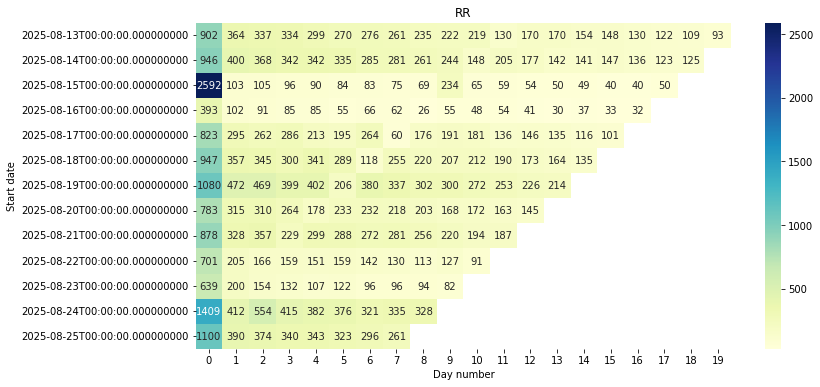

In [39]:
#plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title("RR")
plt.xlabel("Day number")
plt.ylabel("Start date")
plt.show()

The cohort from August 15, 2025 stands out by the number of users.
Let’s calculate the user retention rate (%) on the first day.

In [24]:
retention = heatmap_data

In [25]:
#build a table that divides each column by day 0
retention_norm = retention.div(retention[0], axis=0)

In [26]:
#convert the values to percentages
retention_percent = (retention_norm * 100).round(2)

In [27]:
retention_percent

day_number,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
start_date,,,,,,,,,,,,,,,,,,,,,
2025-08-13,100.0,40.35,37.36,37.03,33.15,29.93,30.60,28.94,26.05,24.61,...,8.87,9.65,18.85,18.85,17.07,16.41,14.41,13.53,12.08,4.55
2025-08-14,100.0,42.28,38.90,36.15,36.15,35.41,30.13,29.70,27.59,25.79,...,9.62,21.67,18.71,15.01,14.90,15.54,14.38,13.00,6.24,NaN
2025-08-15,100.0,3.97,4.05,3.70,3.47,3.24,3.20,2.89,2.66,9.03,...,2.51,2.28,2.08,1.93,1.89,1.54,1.54,0.85,NaN,NaN
2025-08-16,100.0,25.95,23.16,21.63,21.63,13.99,16.79,15.78,6.62,13.99,...,12.21,13.74,10.43,7.63,9.41,8.40,5.09,NaN,NaN,NaN
2025-08-17,100.0,35.84,31.83,34.75,25.88,23.69,32.08,7.29,21.39,23.21,...,21.99,16.52,17.74,16.40,14.09,4.86,NaN,NaN,NaN,NaN
2025-08-18,100.0,37.70,36.43,31.68,36.01,30.52,12.46,26.93,23.23,21.86,...,22.39,20.06,18.27,17.32,5.49,NaN,NaN,NaN,NaN,NaN
2025-08-19,100.0,43.70,43.43,36.94,37.22,19.07,35.19,31.20,27.96,27.78,...,25.19,23.43,20.93,10.83,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-20,100.0,40.23,39.59,33.72,22.73,29.76,29.63,27.84,25.93,21.46,...,21.97,20.82,8.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-21,100.0,37.36,40.66,26.08,34.05,32.80,30.98,32.00,29.16,25.06,...,22.10,10.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The resulting table shows a low user retention rate for the cohort from August 15, 2025 (3.97%)

In [40]:
#check the average retention across all cohorts on day 1
mean_day1 = retention_percent[1].mean().round(1)

In [29]:
mean_day1

33.3

Thus, the analyzed cohorts show an average day-1 retention rate of around 33%,
except for the cohort from August 15, 2025 (3.97%). No other anomalies were detected.

Over time, users from the August 15, 2025 cohort who joined through the marketing campaign continued to churn, though without any sharp fluctuations.



# Conclusion

Therefore, it is necessary to:

- analyze the quality of advertising sources;

- perform traffic segmentation.